## Importing Packages

In [6]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
%matplotlib inline

## Camera Calibration

In [3]:
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

## UnDistortion Function

In [4]:
def undistort_image(image):
    img_size = (image.shape[1], image.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size,None,None)
    return cv2.undistort(image, mtx, dist, None, mtx)
#test for the function
test_image = cv2.imread(images[0])
cv2.imwrite('./output_images/chessboard_before_distortion.jpg', test_image)
cv2.imwrite('./output_images/chessboard_after_distortion.jpg', undistort_image(test_image))

True

## Get Images

In [9]:
images = []
data_path = 'test_images/'
out_path = 'output_images/'
for file in os.listdir(data_path):
    if '.jpg' in file:
        image = mpimg.imread(data_path + file)
        images.append(image)

## Show Images Function

In [19]:
def showImages(process,num=len(images), show_gray=False):
    for i, image in enumerate(images[0:num]):
        f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
        ax1.set_title('Original Image')
        ax1.imshow(image) 
        ax2.set_title('Processed Image')   
        processed = process(image)
        if show_gray:
            ax2.imshow(processed, 'gray')
        else:
            ax2.imshow(processed)
        plt.show()

## Compare between normal images and undistorted images

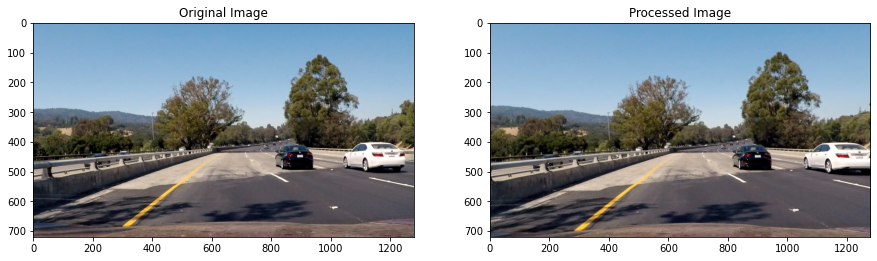

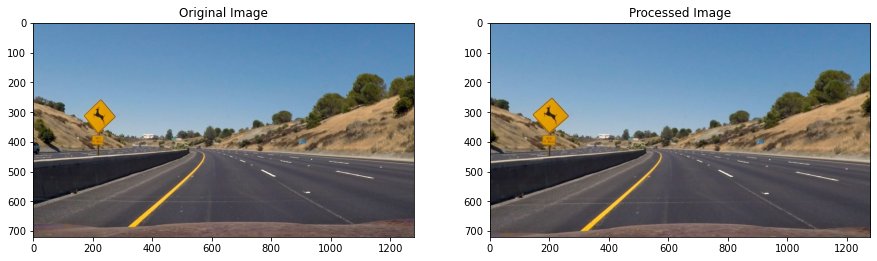

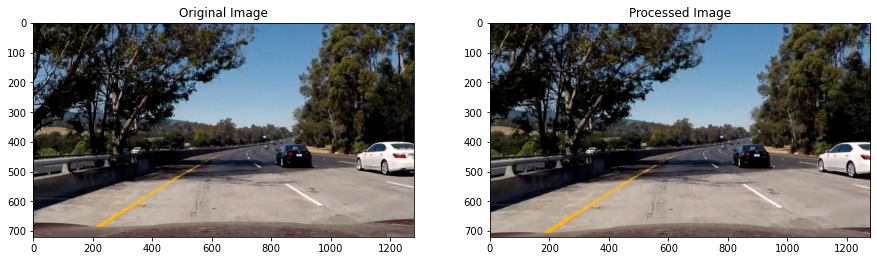

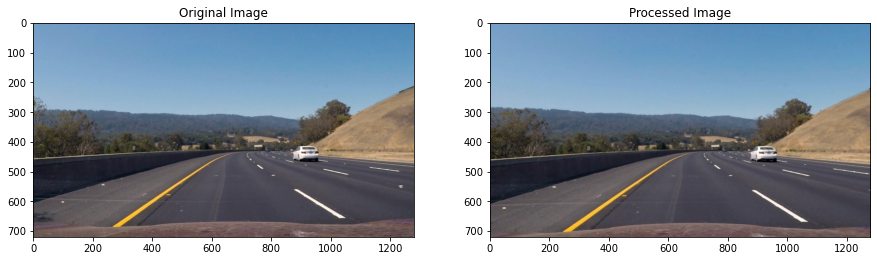

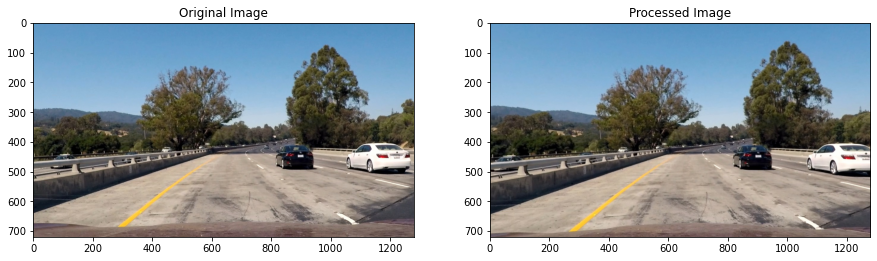

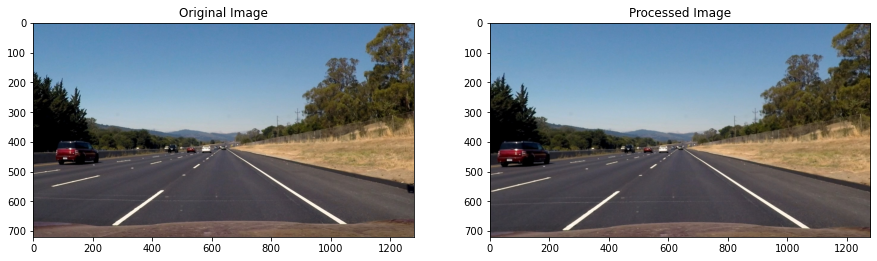

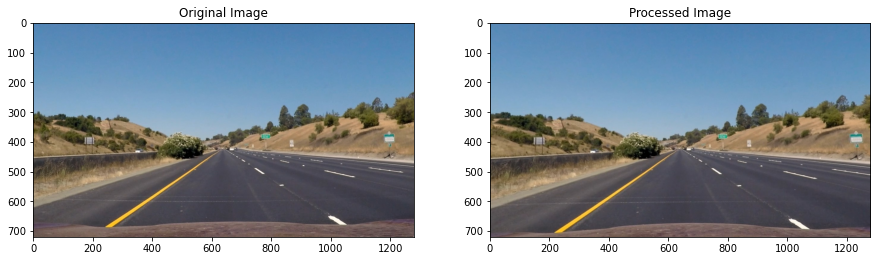

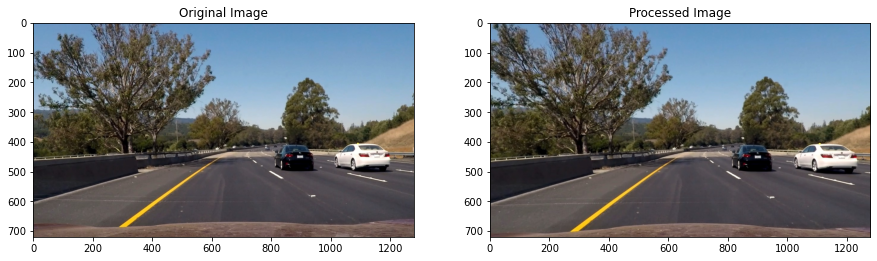

In [20]:
showImages(undistort_image)